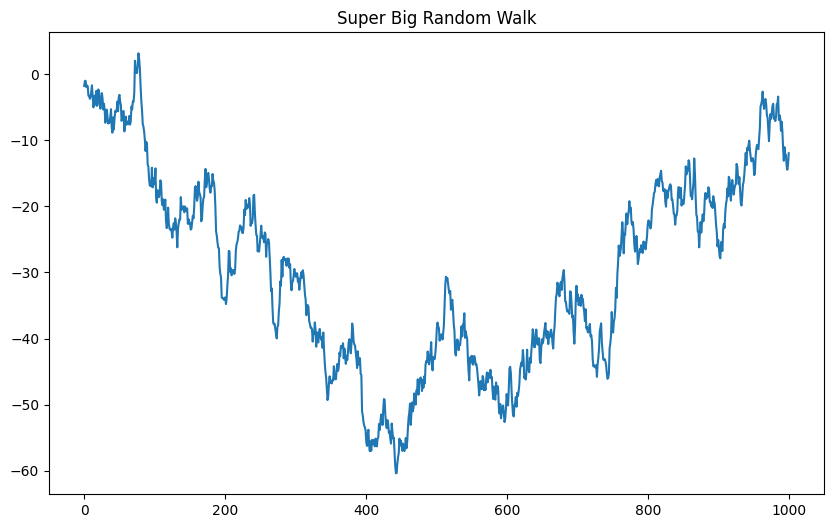

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

y = np.random.normal(0,1.5,1000).cumsum()

plt.figure(figsize=(10,6))
plt.plot(y)
plt.title('Super Big Random Walk')
plt.show()

In [2]:
#turn the series into a suitable sf dataframe
series = pd.DataFrame({'y': y, 'unique_id': 0, 'ds': range(0, len(y))})
series

,y,unique_id,ds
0,-1.819649,0,0
1,-1.061135,0,1
2,-1.031027,0,2
3,-1.999298,0,3
4,-1.732042,0,4
...,...,...,...
995,-12.250376,0,995
996,-13.898184,0,996
997,-14.478594,0,997
998,-13.649499,0,998


In [3]:
from statsforecast.core import StatsForecast
from statsforecast.models import ( 
    AutoARIMA,
    AutoETS
)


sf = StatsForecast(
    models=[AutoETS(season_length=7)],
    freq=1
)

#sf.forecast(df=series, h=7).head() #to see if it works

In [4]:
import ray
import logging

ray.init(logging_level=logging.ERROR)

series = series.reset_index()
series['unique_id'] = series['unique_id'].astype(str)
ctx = ray.data.context.DatasetContext.get_current()
ctx.use_streaming_executor = False
ray_series = ray.data.from_pandas(series).repartition(4)

sf.forecast(df=ray_series, h=7).take(5)

RayTaskError(ModuleNotFoundError): [36mray::get_table_block_metadata()[39m (pid=48604, ip=127.0.0.1)
  File "python\ray\_raylet.pyx", line 1616, in ray._raylet.execute_task
  File "c:\Users\camere\ML\.conda\lib\site-packages\ray\data\_internal\util.py", line 512, in get_table_block_metadata
    return BlockAccessor.for_block(table).get_metadata(
  File "c:\Users\camere\ML\.conda\lib\site-packages\ray\data\block.py", line 379, in for_block
    _check_pyarrow_version()
  File "c:\Users\camere\ML\.conda\lib\site-packages\ray\data\_internal\util.py", line 78, in _check_pyarrow_version
    from pkg_resources._vendor.packaging.version import parse as parse_version
ModuleNotFoundError: No module named 'pkg_resources._vendor'